In [1]:
import jovian

In [3]:
project_name= 'Music genre classification project'

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "augustineadah67/Music genre classification project"
[jovian] Committed successfully! https://jovian.ai/augustineadah67/music-genre-classification-project


'https://jovian.ai/augustineadah67/music-genre-classification-project'

# Music Genre Classification Project

## Dataset Description
So according to Vera Nazarin, if music was a place, then Jazz is the city, Folk is the wilderness, Rock is the Road and classical is a temple. We have all used apps or some streaming app to listen to music. What is the apps logic for creating a personalized playlist of genres for us. One example is to have a Music Genre classification System. The aim of conducting this project is to see how to handle audio files in python, create audio features from them, and run deep learning algorithm on them to see the results. 

Furthermore, I wanted to create a machine learning model which classifies music samples into different genres. It aims to predict the genres using an audio signal as its input. The objective of automating the music classification is to make the selection of songs quick and less cumbersome. If one has to manually classify the songs or music, one has to listen to the whole lot of songs and then select the genre. This is not only time consuming but also difficult.
DATASET

For this project, the dataset we will be working with is the www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification/activity (GTZAN) Genre classification dataset which consists of 1000 audio tracks, each 30 second long. It contains 10 genres each represented by 100 tracks
The 10 genres are:
* Blues
* Classical
* Country
* Disco
* Hip-hop
* Jazz
* Metal
* Pop
* Reggae
* Rock


# Data Analysis and exploration
## Information about the dataset
This dataset contains audio files belonging to 10 classes. There are certain challenges with this dataset in the sense that the data is continuous data and computers can only store discrete data so in what way do we digitize the data in such a way that we can easily store.

So the only solution is that we find a way to store the data that is discrete yet continuous. We sample the data at fixed duration like 0.02 second apart or less or more. The rate at which the data is sampled is known as sampling rate.

When we are sampling the data, what we are actually doing is recording the amplitude at that point. 

# Import libraries
This project is an audio classification project and in this section we import libraries which ranges from librosa, pytorch libraries, matplotlib e.t.c.

In [2]:
import librosa
import librosa. display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio
import os
import torch
import torchvision
from tqdm.notebook import tqdm
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import TensorDataset
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'
from sklearn.model_selection import train_test_split
import glob

## Reading audio files

In [3]:
audios=glob.glob(os.path.join('archive/Data/genres_original/*/*.wav'))
len(audios)

1000

In [4]:
classes=os.listdir('archive/Data/genres_original')
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

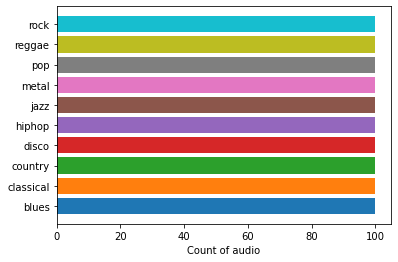

In [5]:
for y in os.listdir('archive/Data/genres_original'):
    plt.barh(y,len(os.listdir('archive/Data/genres_original/{}'.format(y))))
    plt.xlabel('Count of audio')

## File properties

So, analysis was done to know the number of audio files are present in each genre and according to the data above, there are 10 classes or genres containing 100 audio files each

In [ ]:
for classes in os.listdir('archive/Data/genres_original'):
    print("{}".format(classes)+ ":",len(os.listdir('archive/Data/genres_original/{}'.format(classes))))

## Creating and preparing the dataset

So, in order to have an organised dataset, with the use of OS library, a list of all files was created which was then converted to a dictionary and then converted to a pandas dataframe.

In [6]:
y=[]
for name in classes:
    x=os.listdir("archive/Data/genres_original/{}".format(name))
    y.append(x)
y

[['blues.00000.wav',
  'blues.00001.wav',
  'blues.00002.wav',
  'blues.00003.wav',
  'blues.00004.wav',
  'blues.00005.wav',
  'blues.00006.wav',
  'blues.00007.wav',
  'blues.00008.wav',
  'blues.00009.wav',
  'blues.00010.wav',
  'blues.00011.wav',
  'blues.00012.wav',
  'blues.00013.wav',
  'blues.00014.wav',
  'blues.00015.wav',
  'blues.00016.wav',
  'blues.00017.wav',
  'blues.00018.wav',
  'blues.00019.wav',
  'blues.00020.wav',
  'blues.00021.wav',
  'blues.00022.wav',
  'blues.00023.wav',
  'blues.00024.wav',
  'blues.00025.wav',
  'blues.00026.wav',
  'blues.00027.wav',
  'blues.00028.wav',
  'blues.00029.wav',
  'blues.00030.wav',
  'blues.00031.wav',
  'blues.00032.wav',
  'blues.00033.wav',
  'blues.00034.wav',
  'blues.00035.wav',
  'blues.00036.wav',
  'blues.00037.wav',
  'blues.00038.wav',
  'blues.00039.wav',
  'blues.00040.wav',
  'blues.00041.wav',
  'blues.00042.wav',
  'blues.00043.wav',
  'blues.00044.wav',
  'blues.00045.wav',
  'blues.00046.wav',
  'blues.0004

In [7]:
class_dict={}
for i,z in enumerate(classes):
    class_dict[z]=y[i]
class_dict


{'blues': ['blues.00000.wav',
  'blues.00001.wav',
  'blues.00002.wav',
  'blues.00003.wav',
  'blues.00004.wav',
  'blues.00005.wav',
  'blues.00006.wav',
  'blues.00007.wav',
  'blues.00008.wav',
  'blues.00009.wav',
  'blues.00010.wav',
  'blues.00011.wav',
  'blues.00012.wav',
  'blues.00013.wav',
  'blues.00014.wav',
  'blues.00015.wav',
  'blues.00016.wav',
  'blues.00017.wav',
  'blues.00018.wav',
  'blues.00019.wav',
  'blues.00020.wav',
  'blues.00021.wav',
  'blues.00022.wav',
  'blues.00023.wav',
  'blues.00024.wav',
  'blues.00025.wav',
  'blues.00026.wav',
  'blues.00027.wav',
  'blues.00028.wav',
  'blues.00029.wav',
  'blues.00030.wav',
  'blues.00031.wav',
  'blues.00032.wav',
  'blues.00033.wav',
  'blues.00034.wav',
  'blues.00035.wav',
  'blues.00036.wav',
  'blues.00037.wav',
  'blues.00038.wav',
  'blues.00039.wav',
  'blues.00040.wav',
  'blues.00041.wav',
  'blues.00042.wav',
  'blues.00043.wav',
  'blues.00044.wav',
  'blues.00045.wav',
  'blues.00046.wav',
  'b

In [8]:
df=pd.DataFrame(class_dict)
df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,blues.00000.wav,classical.00000.wav,country.00000.wav,disco.00000.wav,hiphop.00000.wav,jazz.00000.wav,metal.00000.wav,pop.00000.wav,reggae.00000.wav,rock.00000.wav
1,blues.00001.wav,classical.00001.wav,country.00001.wav,disco.00001.wav,hiphop.00001.wav,jazz.00001.wav,metal.00001.wav,pop.00001.wav,reggae.00001.wav,rock.00001.wav
2,blues.00002.wav,classical.00002.wav,country.00002.wav,disco.00002.wav,hiphop.00002.wav,jazz.00002.wav,metal.00002.wav,pop.00002.wav,reggae.00002.wav,rock.00002.wav
3,blues.00003.wav,classical.00003.wav,country.00003.wav,disco.00003.wav,hiphop.00003.wav,jazz.00003.wav,metal.00003.wav,pop.00003.wav,reggae.00003.wav,rock.00003.wav
4,blues.00004.wav,classical.00004.wav,country.00004.wav,disco.00004.wav,hiphop.00004.wav,jazz.00004.wav,metal.00004.wav,pop.00004.wav,reggae.00004.wav,rock.00004.wav
...,...,...,...,...,...,...,...,...,...,...
95,blues.00095.wav,classical.00095.wav,country.00095.wav,disco.00095.wav,hiphop.00095.wav,jazz.00095.wav,metal.00095.wav,pop.00095.wav,reggae.00095.wav,rock.00095.wav
96,blues.00096.wav,classical.00096.wav,country.00096.wav,disco.00096.wav,hiphop.00096.wav,jazz.00096.wav,metal.00096.wav,pop.00096.wav,reggae.00096.wav,rock.00096.wav
97,blues.00097.wav,classical.00097.wav,country.00097.wav,disco.00097.wav,hiphop.00097.wav,jazz.00097.wav,metal.00097.wav,pop.00097.wav,reggae.00097.wav,rock.00097.wav
98,blues.00098.wav,classical.00098.wav,country.00098.wav,disco.00098.wav,hiphop.00098.wav,jazz.00098.wav,metal.00098.wav,pop.00098.wav,reggae.00098.wav,rock.00098.wav


### Converting from wide data format to a long data format

The melt method of pandas was used to convert the dataframe from a a wide data format to a long data format. This was done so as to place the genres or classes in the same column

In [9]:
new_df=df.melt(id_vars= None, var_name='Class',value_name='Splice')
new_df

,Class,Splice
0,blues,blues.00000.wav
1,blues,blues.00001.wav
2,blues,blues.00002.wav
3,blues,blues.00003.wav
4,blues,blues.00004.wav
...,...,...
995,rock,rock.00095.wav
996,rock,rock.00096.wav
997,rock,rock.00097.wav
998,rock,rock.00098.wav


## Getting more data with pydubs

So initially, the data comprised of 10 genre folders with 100 audio files each. In data analysis, with data, more is always better so to that end, Pydubs was used to split each audio file of 30 second into 10 files of 3 seconds each. This split files are then transferred to another folder called the genre name and chunked

In [10]:
from pydub import AudioSegment
from pydub.utils import make_chunks

In [11]:
def process_sudio(file_name):
    myaudio= AudioSegment.from_file(file_name,"wav")
    chunk_length_ms = 3000 #pydubs calculates in milliseconds
    chunks= make_chunks(myaudio,chunk_length_ms)
    for i,chunk in enumerate(chunks):
        chunk_name='./chunked/' + file_name + "_{0}.wav".format(i)
        print("exporting", chunk_name)
        chunk.export(chunk_name, format="wav")

In [12]:
all_file_names=os.listdir()
all_file_names
try:
    os.makedirs('chunked')
except:
    pass
for each_file in all_file_names:
        if('.wav' in each_file):
            try: 
                process_sudio(each_file)
            except:
                pass

## Split file properties
As shown below there are the new folder named  chunked contains 10 folders of classes and more that 1000 audio files in those classes

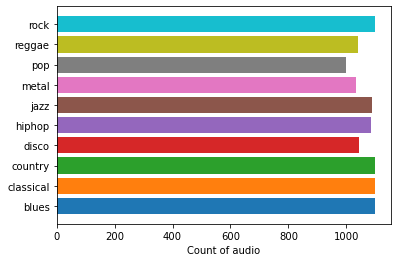

In [13]:
for y in os.listdir('archive/Data/chunked'):
    plt.barh(y,len(os.listdir('archive/Data/chunked/{}'.format(y))))
    plt.xlabel('Count of audio')

## Creating a dataframe
A dataframe was created for the newly split audiofiles and the melt method was used to convert the table from wide table format to a long table format

In [14]:
for y in os.listdir('archive/Data/chunked'):
    print("{}".format(y) + ':' ,len(os.listdir('archive/Data/chunked/{}'.format(y))))

blues: 1100
classical: 1098
country: 1097
disco: 1045
hiphop: 1084
jazz: 1089
metal: 1032
pop: 1000
reggae: 1041
rock: 1098


In [15]:
chunked_list=[]
chunked_classes=os.listdir("archive/Data/chunked/")

In [16]:
for name in chunked_classes:
    x=os.listdir("archive/Data/chunked/{}".format(name))
    chunked_list.append(x)
len(chunked_list)

10

In [17]:
chunked_df= pd.DataFrame(chunked_list)
chunked_df

,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
0,blues.00000.wav_0.wav,blues.00000.wav_1.wav,blues.00000.wav_10.wav,blues.00000.wav_2.wav,blues.00000.wav_3.wav,blues.00000.wav_4.wav,blues.00000.wav_5.wav,blues.00000.wav_6.wav,blues.00000.wav_7.wav,blues.00000.wav_8.wav,...,blues.00099.wav_1.wav,blues.00099.wav_10.wav,blues.00099.wav_2.wav,blues.00099.wav_3.wav,blues.00099.wav_4.wav,blues.00099.wav_5.wav,blues.00099.wav_6.wav,blues.00099.wav_7.wav,blues.00099.wav_8.wav,blues.00099.wav_9.wav
1,classical.00000.wav_0.wav,classical.00000.wav_1.wav,classical.00000.wav_10.wav,classical.00000.wav_2.wav,classical.00000.wav_3.wav,classical.00000.wav_4.wav,classical.00000.wav_5.wav,classical.00000.wav_6.wav,classical.00000.wav_7.wav,classical.00000.wav_8.wav,...,classical.00099.wav_2.wav,classical.00099.wav_3.wav,classical.00099.wav_4.wav,classical.00099.wav_5.wav,classical.00099.wav_6.wav,classical.00099.wav_7.wav,classical.00099.wav_8.wav,classical.00099.wav_9.wav,None,None
2,country.00000.wav_0.wav,country.00000.wav_1.wav,country.00000.wav_10.wav,country.00000.wav_2.wav,country.00000.wav_3.wav,country.00000.wav_4.wav,country.00000.wav_5.wav,country.00000.wav_6.wav,country.00000.wav_7.wav,country.00000.wav_8.wav,...,country.00099.wav_3.wav,country.00099.wav_4.wav,country.00099.wav_5.wav,country.00099.wav_6.wav,country.00099.wav_7.wav,country.00099.wav_8.wav,country.00099.wav_9.wav,None,None,None
3,disco.00000.wav_0.wav,disco.00000.wav_1.wav,disco.00000.wav_10.wav,disco.00000.wav_2.wav,disco.00000.wav_3.wav,disco.00000.wav_4.wav,disco.00000.wav_5.wav,disco.00000.wav_6.wav,disco.00000.wav_7.wav,disco.00000.wav_8.wav,...,None,None,None,None,None,None,None,None,None,None
4,hiphop.00000.wav_0.wav,hiphop.00000.wav_1.wav,hiphop.00000.wav_2.wav,hiphop.00000.wav_3.wav,hiphop.00000.wav_4.wav,hiphop.00000.wav_5.wav,hiphop.00000.wav_6.wav,hiphop.00000.wav_7.wav,hiphop.00000.wav_8.wav,hiphop.00000.wav_9.wav,...,None,None,None,None,None,None,None,None,None,None
5,jazz.00000.wav_0.wav,jazz.00000.wav_1.wav,jazz.00000.wav_10.wav,jazz.00000.wav_2.wav,jazz.00000.wav_3.wav,jazz.00000.wav_4.wav,jazz.00000.wav_5.wav,jazz.00000.wav_6.wav,jazz.00000.wav_7.wav,jazz.00000.wav_8.wav,...,None,None,None,None,None,None,None,None,None,None
6,metal.00000.wav_0.wav,metal.00000.wav_1.wav,metal.00000.wav_2.wav,metal.00000.wav_3.wav,metal.00000.wav_4.wav,metal.00000.wav_5.wav,metal.00000.wav_6.wav,metal.00000.wav_7.wav,metal.00000.wav_8.wav,metal.00000.wav_9.wav,...,None,None,None,None,None,None,None,None,None,None
7,pop.00000.wav_0.wav,pop.00000.wav_1.wav,pop.00000.wav_2.wav,pop.00000.wav_3.wav,pop.00000.wav_4.wav,pop.00000.wav_5.wav,pop.00000.wav_6.wav,pop.00000.wav_7.wav,pop.00000.wav_8.wav,pop.00000.wav_9.wav,...,None,None,None,None,None,None,None,None,None,None
8,reggae.00000.wav_0.wav,reggae.00000.wav_1.wav,reggae.00000.wav_10.wav,reggae.00000.wav_2.wav,reggae.00000.wav_3.wav,reggae.00000.wav_4.wav,reggae.00000.wav_5.wav,reggae.00000.wav_6.wav,reggae.00000.wav_7.wav,reggae.00000.wav_8.wav,...,None,None,None,None,None,None,None,None,None,None
9,rock.00000.wav_0.wav,rock.00000.wav_1.wav,rock.00000.wav_10.wav,rock.00000.wav_2.wav,rock.00000.wav_3.wav,rock.00000.wav_4.wav,rock.00000.wav_5.wav,rock.00000.wav_6.wav,rock.00000.wav_7.wav,rock.00000.wav_8.wav,...,rock.00099.wav_2.wav,rock.00099.wav_3.wav,rock.00099.wav_4.wav,rock.00099.wav_5.wav,rock.00099.wav_6.wav,rock.00099.wav_7.wav,rock.00099.wav_8.wav,rock.00099.wav_9.wav,None,None


In [18]:
new_chunked=chunked_df.transpose()
new_chunked

,0,1,2,3,4,5,6,7,8,9
0,blues.00000.wav_0.wav,classical.00000.wav_0.wav,country.00000.wav_0.wav,disco.00000.wav_0.wav,hiphop.00000.wav_0.wav,jazz.00000.wav_0.wav,metal.00000.wav_0.wav,pop.00000.wav_0.wav,reggae.00000.wav_0.wav,rock.00000.wav_0.wav
1,blues.00000.wav_1.wav,classical.00000.wav_1.wav,country.00000.wav_1.wav,disco.00000.wav_1.wav,hiphop.00000.wav_1.wav,jazz.00000.wav_1.wav,metal.00000.wav_1.wav,pop.00000.wav_1.wav,reggae.00000.wav_1.wav,rock.00000.wav_1.wav
2,blues.00000.wav_10.wav,classical.00000.wav_10.wav,country.00000.wav_10.wav,disco.00000.wav_10.wav,hiphop.00000.wav_2.wav,jazz.00000.wav_10.wav,metal.00000.wav_2.wav,pop.00000.wav_2.wav,reggae.00000.wav_10.wav,rock.00000.wav_10.wav
3,blues.00000.wav_2.wav,classical.00000.wav_2.wav,country.00000.wav_2.wav,disco.00000.wav_2.wav,hiphop.00000.wav_3.wav,jazz.00000.wav_2.wav,metal.00000.wav_3.wav,pop.00000.wav_3.wav,reggae.00000.wav_2.wav,rock.00000.wav_2.wav
4,blues.00000.wav_3.wav,classical.00000.wav_3.wav,country.00000.wav_3.wav,disco.00000.wav_3.wav,hiphop.00000.wav_4.wav,jazz.00000.wav_3.wav,metal.00000.wav_4.wav,pop.00000.wav_4.wav,reggae.00000.wav_3.wav,rock.00000.wav_3.wav
...,...,...,...,...,...,...,...,...,...,...
1095,blues.00099.wav_5.wav,classical.00099.wav_7.wav,country.00099.wav_8.wav,None,None,None,None,None,None,rock.00099.wav_7.wav
1096,blues.00099.wav_6.wav,classical.00099.wav_8.wav,country.00099.wav_9.wav,None,None,None,None,None,None,rock.00099.wav_8.wav
1097,blues.00099.wav_7.wav,classical.00099.wav_9.wav,None,None,None,None,None,None,None,rock.00099.wav_9.wav
1098,blues.00099.wav_8.wav,None,None,None,None,None,None,None,None,None


In [19]:
new_chunked.columns=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock' ]

In [20]:
new_chunked

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,blues.00000.wav_0.wav,classical.00000.wav_0.wav,country.00000.wav_0.wav,disco.00000.wav_0.wav,hiphop.00000.wav_0.wav,jazz.00000.wav_0.wav,metal.00000.wav_0.wav,pop.00000.wav_0.wav,reggae.00000.wav_0.wav,rock.00000.wav_0.wav
1,blues.00000.wav_1.wav,classical.00000.wav_1.wav,country.00000.wav_1.wav,disco.00000.wav_1.wav,hiphop.00000.wav_1.wav,jazz.00000.wav_1.wav,metal.00000.wav_1.wav,pop.00000.wav_1.wav,reggae.00000.wav_1.wav,rock.00000.wav_1.wav
2,blues.00000.wav_10.wav,classical.00000.wav_10.wav,country.00000.wav_10.wav,disco.00000.wav_10.wav,hiphop.00000.wav_2.wav,jazz.00000.wav_10.wav,metal.00000.wav_2.wav,pop.00000.wav_2.wav,reggae.00000.wav_10.wav,rock.00000.wav_10.wav
3,blues.00000.wav_2.wav,classical.00000.wav_2.wav,country.00000.wav_2.wav,disco.00000.wav_2.wav,hiphop.00000.wav_3.wav,jazz.00000.wav_2.wav,metal.00000.wav_3.wav,pop.00000.wav_3.wav,reggae.00000.wav_2.wav,rock.00000.wav_2.wav
4,blues.00000.wav_3.wav,classical.00000.wav_3.wav,country.00000.wav_3.wav,disco.00000.wav_3.wav,hiphop.00000.wav_4.wav,jazz.00000.wav_3.wav,metal.00000.wav_4.wav,pop.00000.wav_4.wav,reggae.00000.wav_3.wav,rock.00000.wav_3.wav
...,...,...,...,...,...,...,...,...,...,...
1095,blues.00099.wav_5.wav,classical.00099.wav_7.wav,country.00099.wav_8.wav,None,None,None,None,None,None,rock.00099.wav_7.wav
1096,blues.00099.wav_6.wav,classical.00099.wav_8.wav,country.00099.wav_9.wav,None,None,None,None,None,None,rock.00099.wav_8.wav
1097,blues.00099.wav_7.wav,classical.00099.wav_9.wav,None,None,None,None,None,None,None,rock.00099.wav_9.wav
1098,blues.00099.wav_8.wav,None,None,None,None,None,None,None,None,None


In [21]:
melted_df=new_chunked.melt(id_vars=None, var_name='classes',value_name='splice')
melted_df

,classes,splice
0,blues,blues.00000.wav_0.wav
1,blues,blues.00000.wav_1.wav
2,blues,blues.00000.wav_10.wav
3,blues,blues.00000.wav_2.wav
4,blues,blues.00000.wav_3.wav
...,...,...
10995,rock,rock.00099.wav_7.wav
10996,rock,rock.00099.wav_8.wav
10997,rock,rock.00099.wav_9.wav
10998,rock,None


In [22]:
melted_df.dropna(inplace=True)
melted_df

,classes,splice
0,blues,blues.00000.wav_0.wav
1,blues,blues.00000.wav_1.wav
2,blues,blues.00000.wav_10.wav
3,blues,blues.00000.wav_2.wav
4,blues,blues.00000.wav_3.wav
...,...,...
10993,rock,rock.00099.wav_5.wav
10994,rock,rock.00099.wav_6.wav
10995,rock,rock.00099.wav_7.wav
10996,rock,rock.00099.wav_8.wav


In [23]:
melted_df.classes.value_counts()

blues        1100
classical    1098
rock         1098
country      1097
jazz         1089
hiphop       1084
disco        1045
reggae       1041
metal        1032
pop          1000
Name: classes, dtype: int64

## Visualising the data
Librosa and IPD was used to visualise the audio data. Librosa loads and decodes the audio as a time series y.

sr is the sampling rate of y. It is the numbers of samples per second. 20kHz is the audible range for human beings, so it is sued as default value for sr.

In [24]:
import random

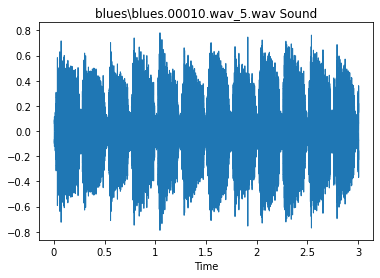

In [25]:
audio_dir=glob.glob(os.path.join("archive/Data/chunked/blues/*.wav"),recursive=True)

audio=random.choice(audio_dir)
audio
data,sample_rate= librosa.load(audio)
librosa.display.waveshow(data, sr=sample_rate);
plt.title(f"{audio.split('/')[-1]} Sound");
Audio(audio)

Waveforms are the visual representations of sound as time on the x-axis and amplitude on the y axis. They are great great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be similar than others. In this project, most of the visualisations used is waveform

Next things to do
- Seperate into training set and test set
- Convert to Mfccs
- Convert to tensors then to tensor datasets then split training to training and validation set
- Create dataloaders and move to device
- define the model with cuda, classification class and convoluted tube
- Define the fit with the evaluate and get_lr
- Fit the model
- evaluate on the test set
- predict on the test set, log hyperparameters and commit

## Feature extraction with mfcc
librosa which is a library has methods to extract features from audio. MFCCs uses Mel scaling to try to model the way that the human being auditory system percieves sounds rather than describe them on a purely frequency basis. This means MFCC represents the timbre of a signal.

Furthermore, the features extracted are to be used as inputs in a CNN model and a CNN model expects a 3 dimensional input, so to that end, the wave file is scaled to half its original size, then 40 mfccs is generated and then the array is padded and reshaped into a 3 dimensional shape for uniformity.

In [26]:
def conv2mfcc(filename,n_mfcc=40):
    pad_length=80
    wave, sr = librosa.load(filename,mono=True)
    wave=wave[::2]
    mfcc = librosa.feature.mfcc(y=wave, sr=44100, n_mfcc=n_mfcc)
    pad_width = pad_length - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant').reshape(1,80,40)
    return mfcc

In [27]:
# input_col=melted_df.columns[0]
melted_df['classes']= melted_df.classes.astype('category')
melted_df.info()
melted_df['class_category']=melted_df['classes'].cat.codes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10684 entries, 0 to 10997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   classes  10684 non-null  category
 1   splice   10684 non-null  object  
dtypes: category(1), object(1)
memory usage: 177.7+ KB


As shown below the class label was converted to a categorical datatype and encoded into class category column as codes

In [28]:
melted_df

,classes,splice,class_category
0,blues,blues.00000.wav_0.wav,0
1,blues,blues.00000.wav_1.wav,0
2,blues,blues.00000.wav_10.wav,0
3,blues,blues.00000.wav_2.wav,0
4,blues,blues.00000.wav_3.wav,0
...,...,...,...
10993,rock,rock.00099.wav_5.wav,9
10994,rock,rock.00099.wav_6.wav,9
10995,rock,rock.00099.wav_7.wav,9
10996,rock,rock.00099.wav_8.wav,9


## Converting into training, validation and testing set

In [29]:
train_val_ds, test_ds=train_test_split(melted_df, test_size=0.2, random_state=42)

In [30]:
len(train_val_ds),len(test_ds)

(8547, 2137)

In [31]:
mfcc_feature=[]
for index,row in tqdm(train_val_ds.iterrows()):
    filename= f"archive/Data/chunked/{row.values[0]}/"+row.values[1]
    label= row.values[0]
    data=conv2mfcc(filename)
    mfcc_feature.append([data,label,row.values[1]])

0it [00:00, ?it/s]

C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=143
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=88
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1455
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1345
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=904
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=794
  return f(*args, **kwarg

In [32]:
test_feature=[]
for index,row in tqdm(test_ds.iterrows()):
    filename= f"archive/Data/chunked/{row.values[0]}/"+row.values[1]
    label= row.values[0]
    data=conv2mfcc(filename)
    test_feature.append([data,label,row.values[1]])

0it [00:00, ?it/s]

C:\Users\HP\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=243
  return f(*args, **kwargs)


In [33]:
mfcc_df=pd.DataFrame(mfcc_feature,columns=['features','label','splice'])
mfcc_df
test_df=pd.DataFrame(test_feature,columns=['features','label','splice'])

## Converting to tensors

In [34]:
mfcc_df.label=mfcc_df.label.astype('category')
mfcc_df['label_category']= mfcc_df.label.cat.codes
test_df.label=test_df.label.astype('category')
test_df['label_category']= test_df.label.cat.codes

In [35]:
mfcc_df.label_category= mfcc_df.label_category.astype('int')
test_df.label_category= test_df.label_category.astype('int')

In [36]:
inputs=list(mfcc_df.features.values)
label=list(mfcc_df.label_category.values)
test_inputs=list(test_df.features.values)
test_label=list(test_df.label_category.values)

In [37]:
inputs_base=inputs
labels_base=label
test_inputs_base=test_inputs
test_labels_base=test_label

In [38]:
inputs=np.array(inputs_base)
labels=np.array(labels_base)
test_inputs=np.array(test_inputs_base)
test_labels=np.array(test_labels_base)

In [39]:
inputs.shape

(8547, 1, 80, 40)

In [40]:
test_inputs.shape

(2137, 1, 80, 40)

In [41]:
inputs=torch.tensor(inputs).float()
labels=torch.tensor(labels).long()
test_inputs=torch.tensor(test_inputs).float()
test_labels=torch.tensor(test_labels).long()

## Tensor Datasets

In [42]:
dataset= TensorDataset(inputs,labels)
test_ds= TensorDataset(test_inputs,test_labels)

In [43]:
train_ds, val_ds= random_split(dataset,[7500,1047])

## Creating DataLoaders

In [44]:
batch_size=128
train_loader= DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader= DataLoader(val_ds, batch_size* 2, num_workers=4, pin_memory=True)
test_loader= DataLoader(test_ds, batch_size* 2, num_workers=4, pin_memory=True)

## Creating GPU function

In [45]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [46]:
device = get_default_device()
device

device(type='cpu')

## Device Dataloaders

In [47]:
train_dl = DeviceDataLoader(train_loader, device)
valid_dl = DeviceDataLoader(val_loader, device)
test_dl= DeviceDataLoader(test_loader, device)

## CNN Model Creating zone

In [6]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class AudioClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [49]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet(AudioClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
#         Input size of 1*80*40
        self.conv1 = conv_block(in_channels, 64)
#         Output= 64 * 80 * 40
        self.conv2 = conv_block(64, 128, pool=True)
#         Output= 128 * 40 * 20
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
#         Output= 256 * 20 * 10
        self.conv4 = conv_block(256, 512, pool=True)
#         Output= 512 * 10 * 5
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
#                             The maxpool2d(4) further divides the height and width by 4 which makes the out = 512 * 2 * 1
                                        nn.Flatten(), 
                                        nn.Dropout(0.2), # To reduce overfitting
                                        nn.Linear(512*2, 512), 
                                        nn.ReLU(),
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

## Model
Next we instantiate a model which recieves a one channel input and outputs 10 classes

In [50]:
model = to_device(ResNet(1, 10), device)
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tru

## Fit and train the model

In [51]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [52]:
inputs,label=dataset[0]
inputs.shape

torch.Size([1, 80, 40])

In [53]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.760629653930664, 'val_acc': 0.09786005318164825}]

In [54]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [55]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00275, train_loss: 1.9949, val_loss: 3.7917, val_acc: 0.1393
Epoch [1], last_lr: 0.00758, train_loss: 1.5111, val_loss: 2.1691, val_acc: 0.3500
Epoch [2], last_lr: 0.01000, train_loss: 1.4640, val_loss: 1.7651, val_acc: 0.4274
Epoch [3], last_lr: 0.00950, train_loss: 1.4190, val_loss: 1.3643, val_acc: 0.5087
Epoch [4], last_lr: 0.00812, train_loss: 1.3532, val_loss: 1.6018, val_acc: 0.4951
Epoch [5], last_lr: 0.00611, train_loss: 1.2645, val_loss: 1.1837, val_acc: 0.5636
Epoch [6], last_lr: 0.00389, train_loss: 1.1105, val_loss: 0.9442, val_acc: 0.6607
Epoch [7], last_lr: 0.00188, train_loss: 0.9243, val_loss: 0.8696, val_acc: 0.6986
Epoch [8], last_lr: 0.00050, train_loss: 0.7986, val_loss: 0.7459, val_acc: 0.7352
Epoch [9], last_lr: 0.00000, train_loss: 0.7057, val_loss: 0.7248, val_acc: 0.7407
Wall time: 2h 8min 23s
Parser   : 254 ms


In [56]:
epochs=10
max_lr=0.001
grad_clip=0.1
weight_decay=1e-4
opt_func = torch.optim.Adam

In [57]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00028, train_loss: 0.6938, val_loss: 0.7876, val_acc: 0.7163
Epoch [1], last_lr: 0.00076, train_loss: 0.6792, val_loss: 0.8797, val_acc: 0.7007
Epoch [2], last_lr: 0.00100, train_loss: 0.7053, val_loss: 0.7890, val_acc: 0.7322
Epoch [3], last_lr: 0.00095, train_loss: 0.6386, val_loss: 0.7917, val_acc: 0.7156
Epoch [4], last_lr: 0.00081, train_loss: 0.5727, val_loss: 0.7704, val_acc: 0.7573
Epoch [5], last_lr: 0.00061, train_loss: 0.4769, val_loss: 0.5898, val_acc: 0.7925
Epoch [6], last_lr: 0.00039, train_loss: 0.3753, val_loss: 0.6636, val_acc: 0.7538
Epoch [7], last_lr: 0.00019, train_loss: 0.3037, val_loss: 0.5831, val_acc: 0.8159
Epoch [8], last_lr: 0.00005, train_loss: 0.2451, val_loss: 0.5578, val_acc: 0.8182
Epoch [9], last_lr: 0.00000, train_loss: 0.2349, val_loss: 0.5591, val_acc: 0.8198
Wall time: 2h 4min 25s


In [60]:
epochs=10
max_lr=0.0001
grad_clip=0.1
weight_decay=1e-4
opt_func = torch.optim.Adam

In [61]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00003, train_loss: 0.2278, val_loss: 0.5640, val_acc: 0.8198
Epoch [1], last_lr: 0.00008, train_loss: 0.2159, val_loss: 0.5729, val_acc: 0.8198
Epoch [2], last_lr: 0.00010, train_loss: 0.2176, val_loss: 0.5898, val_acc: 0.8159
Epoch [3], last_lr: 0.00010, train_loss: 0.2123, val_loss: 0.5523, val_acc: 0.8301
Epoch [4], last_lr: 0.00008, train_loss: 0.1914, val_loss: 0.6001, val_acc: 0.8332
Epoch [5], last_lr: 0.00006, train_loss: 0.1853, val_loss: 0.5831, val_acc: 0.8324
Epoch [6], last_lr: 0.00004, train_loss: 0.1786, val_loss: 0.5935, val_acc: 0.8276
Epoch [7], last_lr: 0.00002, train_loss: 0.1700, val_loss: 0.5959, val_acc: 0.8355
Epoch [8], last_lr: 0.00000, train_loss: 0.1659, val_loss: 0.5845, val_acc: 0.8340
Epoch [9], last_lr: 0.00000, train_loss: 0.1654, val_loss: 0.5834, val_acc: 0.8363
Wall time: 2h 10min 33s


In [62]:
torch.save(model.state_dict(), 'audio-resnet.pth')

In [63]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

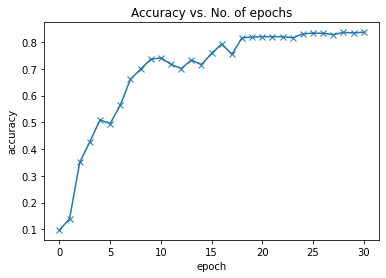

In [64]:
plot_accuracies(history)

In [65]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

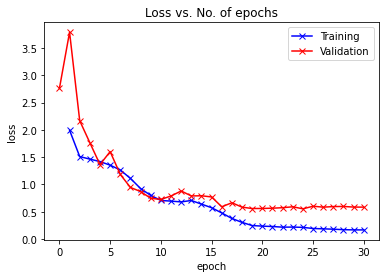

In [66]:
plot_losses(history)

In [67]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

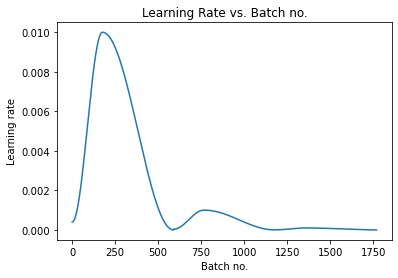

In [68]:
plot_lrs(history)

In [70]:
test_eval=[evaluate(model,test_dl)]
test_eval

[{'val_loss': 0.4909988045692444, 'val_acc': 0.8512308597564697}]

## Predicting on a single input

In [110]:
data,labels=test_ds[0]
output=model(data.unsqueeze(0))
_,pred=(torch.max(output,dim=1))
pred=pred.numpy()
labels=labels.numpy()
print('Predicted:',pred,'Label:',labels)

Predicted: [5] Label: 5


In [111]:
data,labels=test_ds[559]
output=model(data.unsqueeze(0))
_,pred=(torch.max(output,dim=1))
pred=pred.numpy()
labels=labels.numpy()
print('Predicted:',pred,'Label:',labels)

Predicted: [1] Label: 1


## Save and commit

In [112]:
torch.save(model.state_dict(), 'audio-resnet.pth')

In [114]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=30, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [116]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time='6hrs')

[jovian] Metrics logged.


In [79]:
category_map={}
for num,item in enumerate(classes):
    category_map[item]=num
category_map

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [80]:
label={idx:noise for noise, idx in category_map.items()}

## Conclusions

So our model trained up to 85%. This could have been better with data augmentation or standard scaling with scikit learn. In conclusion, not only mfccs can be used for feature extraction. Others includes chroma_stft, spectral centroid, spectral_bandwidth e.t.c.
In addition, tempo could also be used as a differentiating factor when considering intensity of the sounds

In [7]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "augustineadah67/music-genre-classification-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/augustineadah67/music-genre-classification-project


'https://jovian.ai/augustineadah67/music-genre-classification-project'